In [1]:
#Import dependencies
import pandas as pd
from census import Census
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import csv

# Poverty and Tempurature

In [2]:
#Read drought, temperature and poverty data frame
merged_df = pd.read_csv('data_output/drought_temp_census_2010_2019.csv')

In [3]:
#Look at counties that experiences temperatures over 103.9
merged_df.loc[merged_df['Temp (F)'] >=103.9]

,Unnamed: 0,Unnamed: 0.1,Year,County,None,D0,D1,D2,D3,D4,...,Poverty Count,county,Poverty Rate,Unemployment Count,Location ID,Month,Temp (F),Rank,Anomaly (1901-2000 base period),1901-2000 Mean
12,12,70,2010,Imperial,84.100769,15.899231,5.432308,0.000000,0.000000,0.0,...,33784.0,25.0,20.103301,NaN,CA-025,12,108.2,123,4.7,105.9
70,70,128,2011,Imperial,58.449615,41.550385,0.000000,0.000000,0.000000,0.0,...,37463.0,25.0,21.864331,11406.0,CA-025,12,110.0,126,5.7,105.9
128,128,186,2012,Imperial,5.326981,94.673019,75.309811,0.000000,0.000000,0.0,...,37544.0,25.0,21.640815,12743.0,CA-025,12,106.3,123,6.2,105.9
186,186,244,2013,Imperial,0.471154,99.528846,82.240192,30.569808,0.000000,0.0,...,38286.0,25.0,21.852615,13214.0,CA-025,12,106.5,121,7.7,105.9
244,244,302,2014,Imperial,0.229231,99.770769,85.230192,63.451154,0.016923,0.0,...,38935.0,25.0,21.993944,12765.0,CA-025,12,107.4,126,9.0,105.9
302,302,360,2015,Imperial,0.000000,100.000000,94.576923,59.536923,0.000000,0.0,...,40114.0,25.0,22.509904,12307.0,CA-025,12,108.7,127,8.7,105.9
360,360,418,2016,Imperial,0.000000,100.000000,97.485000,84.086923,0.000000,0.0,...,40552.0,25.0,22.679202,12048.0,CA-025,12,109.3,127,8.7,105.9
418,418,476,2017,Imperial,0.171923,99.828077,87.679423,29.024615,0.000000,0.0,...,40376.0,25.0,22.436471,11415.0,CA-025,12,108.5,123,8.0,105.9
476,476,534,2018,Imperial,0.000000,100.000000,98.661887,74.027925,51.116226,0.0,...,41191.0,25.0,22.856461,10782.0,CA-025,12,107.9,125,7.6,105.9
534,534,592,2019,Imperial,43.450962,56.549038,16.018654,2.043077,0.000000,0.0,...,41100.0,25.0,22.744755,9924.0,CA-025,12,108.2,121,3.9,105.9


Correlation coefficient = 0.4
Linear regression model: y = 0.59x + 80.4
P-Value = 2.8288635562389916e-24


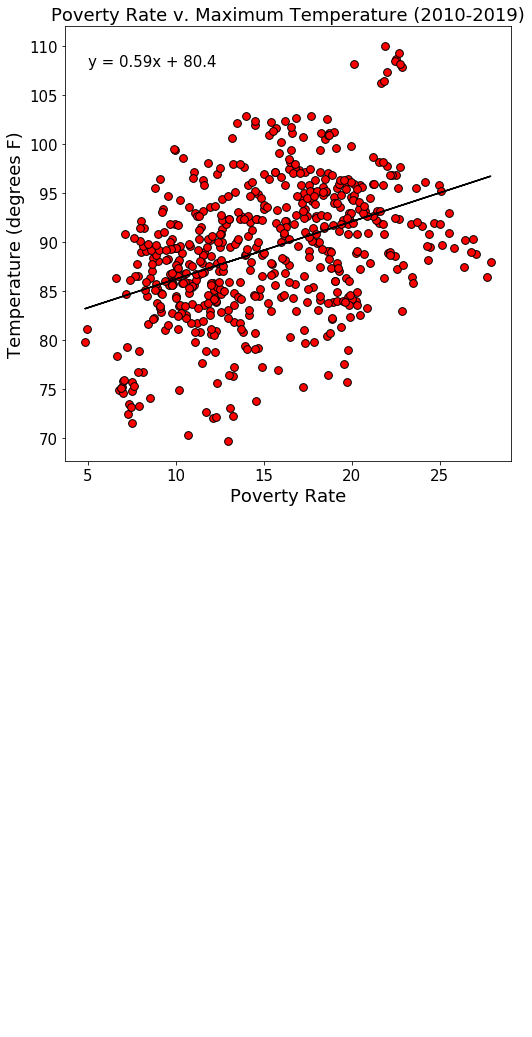

In [4]:
# Create a scatterplot for poverty rate v. maximum temperature

#Define variables
x = merged_df['Poverty Rate']
y = merged_df['Temp (F)']

#Plot data
plt.figure(figsize=(8,8))
plt.title("Poverty Rate v. Maximum Temperature (2010-2019)", fontsize = '18')
plt.xlabel("Poverty Rate", fontsize = '18')
plt.ylabel("Temperature (degrees F)", fontsize = '18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cap_plot = plt.scatter(x,y, marker="o", color="red",edgecolors="black",s=60)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,108),fontsize=15,color="black")

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')

plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

plt.savefig('data_output/Figures/MaxTemp_PovertyRate.png')

plt.show()

Correlation coefficient = -0.41
Linear regression model: y = -0.0x + 99.4
P-Value = 1.7243762304687803e-24


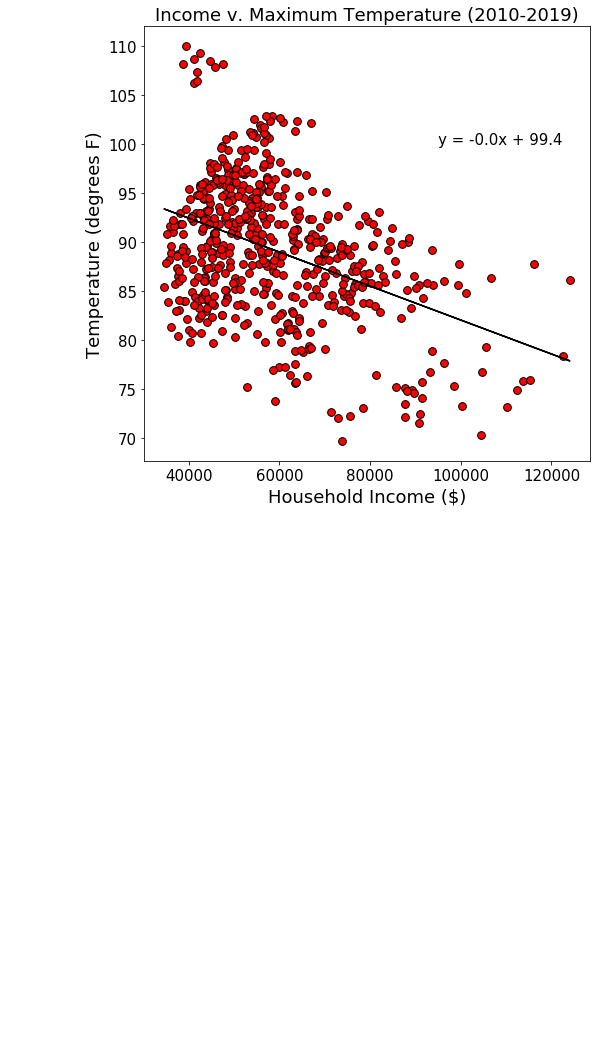

In [5]:
# Create a scatterplot for poverty rate v. household income

#Define variables
x = merged_df['Household Income']
y = merged_df['Temp (F)']

#Plot data
plt.figure(figsize=(8,8))
plt.title("Income v. Maximum Temperature (2010-2019)", fontsize = '18')
plt.xlabel("Household Income ($)", fontsize = '18')
plt.ylabel("Temperature (degrees F)", fontsize = '18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cap_plot = plt.scatter(x,y, marker="o", color="red",edgecolors="black",s=60)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(95000,100),fontsize=15,color="black")

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')

plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

plt.savefig('data_output/Figures/MaxTemp_Income.png')

plt.show()

# Poverty and drought

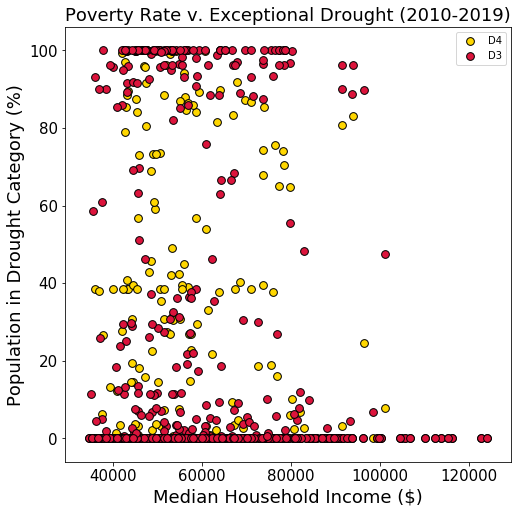

In [6]:
# Create a scatterplot for income v. drought category

#Define variables
x = merged_df['Household Income']
y = merged_df['D4']
y2 = merged_df['D3']
#Plot data

plt.figure(figsize=(8,8))
plt.xlabel("Median Household Income ($)", fontsize = '18')
plt.ylabel("Population in Drought Category (%)", fontsize = '18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cap_plot = plt.scatter(x,y, marker="o", color="gold",edgecolors="black",s=60,label ='D4')
cap_plot = plt.scatter(x,y2, marker="o", color="crimson",edgecolors="black",s=60,label ='D3')
plt.legend()
plt.title("Poverty Rate v. Exceptional Drought (2010-2019)", fontsize = '18')
plt.savefig('data_output/Figures/D4_D3_Income.png')

plt.show()

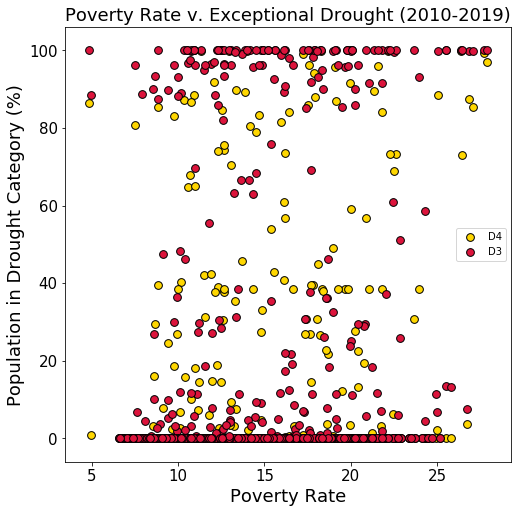

In [7]:
# Create a scatterplot for poverty rate v. drought category

#Define variables
x = merged_df['Poverty Rate']
y = merged_df['D4']
y2 = merged_df['D3']
#Plot data

plt.figure(figsize=(8,8))
plt.xlabel("Poverty Rate", fontsize = '18')
plt.ylabel("Population in Drought Category (%)", fontsize = '18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cap_plot = plt.scatter(x,y, marker="o", color="gold",edgecolors="black",s=60,label ='D4')
cap_plot = plt.scatter(x,y2, marker="o", color="crimson",edgecolors="black",s=60,label ='D3')
plt.legend()
plt.title("Poverty Rate v. Exceptional Drought (2010-2019)", fontsize = '18')
plt.savefig('data_output/Figures/D4_D3_PovertyRate.png')

plt.show()

In [8]:
#Look for correlations between income/poverty and counties where 100% of population experienced D4

D4 = merged_df.loc[merged_df["D4"] == 100]
D4_rate = D4["Poverty Rate"]
Other=merged_df.loc[merged_df["D4"] <100]
Other_rate = Other["Poverty Rate"]

#T-test for income between extreme and nonextremem max temps
st.ttest_ind(D4_rate, Other_rate, equal_var=False)

Ttest_indResult(statistic=0.6282105476919337, pvalue=0.546874917110178)

In [9]:
#Bin household income 

bins = [0,35000,55000,75000,95000,115000,135000]
labels = ["0-35,000","35,000-55,000","55,000-75,000","75,000-95,000","95,000-115,000","115,000-135,000"]

merged_df["Income"] = pd.cut(merged_df["Household Income"],bins, labels=labels, include_lowest=True)
averaged = merged_df.groupby(merged_df['Income'])
averaged = averaged.mean()
averaged = averaged[['None','D0','D1','D2','D3','D4']]
averaged = averaged.reset_index()
averaged.head()

,Income,None,D0,D1,D2,D3,D4
0,"0-35,000",1.184904,98.815096,92.669712,66.545000,5.734327,0.000000
1,"35,000-55,000",36.043751,63.956249,51.926519,37.318752,24.636133,14.298663
2,"55,000-75,000",41.386413,58.613587,44.477028,32.699001,20.913754,11.783058
3,"75,000-95,000",36.248689,63.751311,45.848444,33.996376,21.388649,11.357270
4,"95,000-115,000",55.437946,44.562054,18.866162,15.283901,10.319162,2.313407


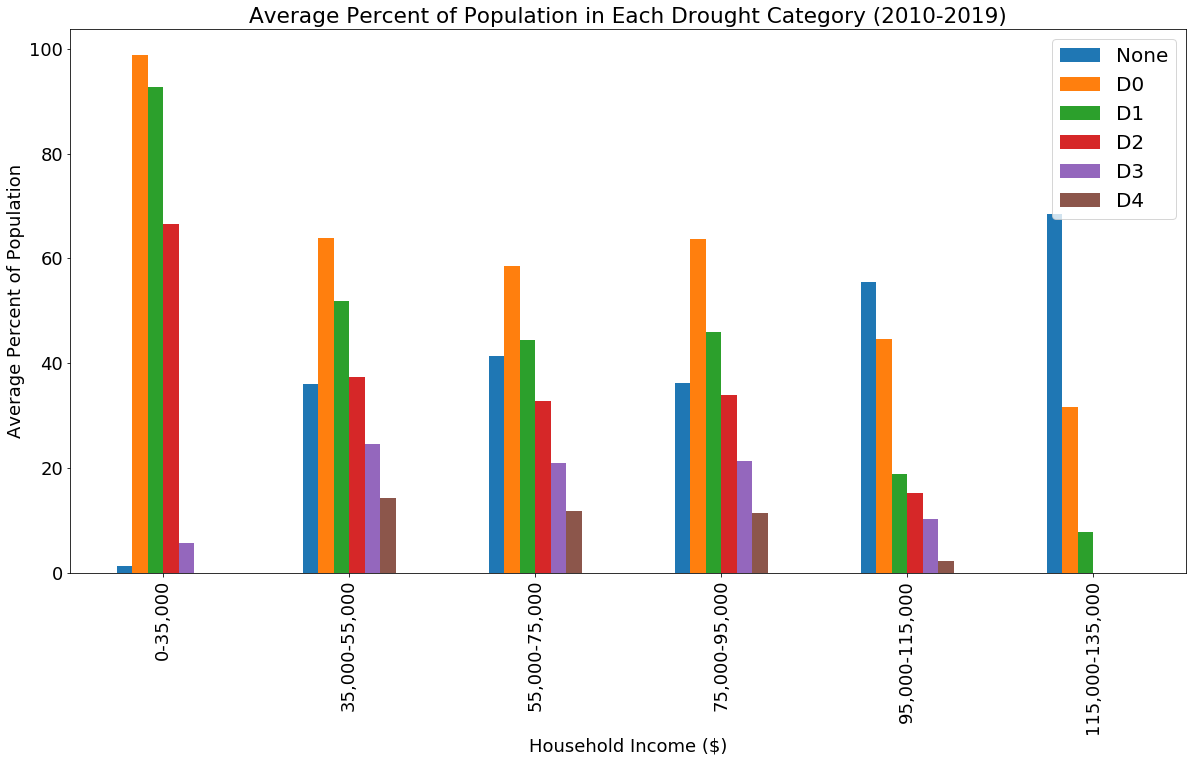

In [10]:
#Create a grouped bar chart of income level v. drought categories 
plt.rcParams.update({'font.size': 18})
averaged.plot(x='Income',
        kind='bar',
        stacked=False,
        title = "Average Percent of Population in Each Drought Category (2010-2019)",
        figsize=(20,10), fontsize='18')

# Add text for labels, title and custom x-axis tick labels, etc.
plt.xlabel("Household Income ($)", fontsize='18')
plt.ylabel("Average Percent of Population",fontsize='18')
plt.legend(loc=1, prop={'size': 20})

plt.savefig('data_output/Figures/Drought_IncomeBins.png',bbox_inches='tight')

# Poverty and wildfire

In [6]:
import pandas as pd
from census import Census
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import csv

In [8]:
average_data = 'data_output/wildfire_avg_census.csv'

cleaned_merged_sum_df = pd.read_csv(average_data)

cleaned_merged_sum_df

,Year,County,Poverty Rate,Household Income,Acres Burned
0,2013,Alameda,12.278212,72112.0,119.500000
1,2013,Amador,11.089733,53684.0,96.000000
2,2013,Butte,19.924550,43752.0,494.142857
3,2013,Calaveras,10.740470,55295.0,38.500000
4,2013,Colusa,12.332678,52158.0,28.000000
...,...,...,...,...,...
193,2019,Tehama,21.795594,44514.0,1945.222222
194,2019,Tulare,23.492633,49687.0,236.285714
195,2019,Tuolumne,11.921547,60108.0,52.000000
196,2019,Ventura,8.810133,88131.0,2084.333333


In [9]:
sum_data = 'data_output/wildfire_avg_census.csv'

cleaned_merged_avg_df = pd.read_csv(sum_data)

cleaned_merged_avg_df

,Year,County,Poverty Rate,Household Income,Acres Burned
0,2013,Alameda,12.278212,72112.0,119.500000
1,2013,Amador,11.089733,53684.0,96.000000
2,2013,Butte,19.924550,43752.0,494.142857
3,2013,Calaveras,10.740470,55295.0,38.500000
4,2013,Colusa,12.332678,52158.0,28.000000
...,...,...,...,...,...
193,2019,Tehama,21.795594,44514.0,1945.222222
194,2019,Tulare,23.492633,49687.0,236.285714
195,2019,Tuolumne,11.921547,60108.0,52.000000
196,2019,Ventura,8.810133,88131.0,2084.333333


Correlation coefficient = 0.02
Linear regression model: y = 0.02x + 3708.98
P-Value = 0.7759271211988347


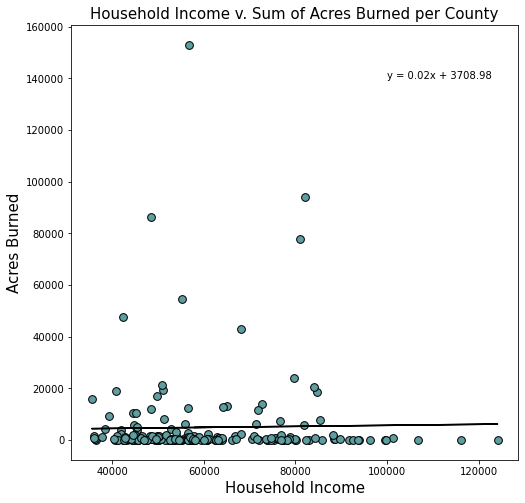

In [15]:
# Create a scatterplot for household income v. sum of acres burned per county

x = cleaned_merged_sum_df['Household Income']
y = cleaned_merged_sum_df['Acres Burned']

plt.figure(figsize=(8,8))
plt.title("Household Income v. Sum of Acres Burned per County", fontsize = '15')
plt.xlabel("Household Income", fontsize = '15')
plt.ylabel("Acres Burned", fontsize = '15')
plt.scatter(x, y, marker = "o", color = "cadetblue", edgecolors = "black", s = 60)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (100000, 140000), fontsize = 10, color = "black")

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')

plt.plot(x, regress_values, "black")

plt.savefig('data_output/Figures/Household_Income_Sum_Acres_Burned.png')

plt.show()

Correlation coefficient = -0.09
Linear regression model: y = -293.3x + 9368.36
P-Value = 0.22238348991499063


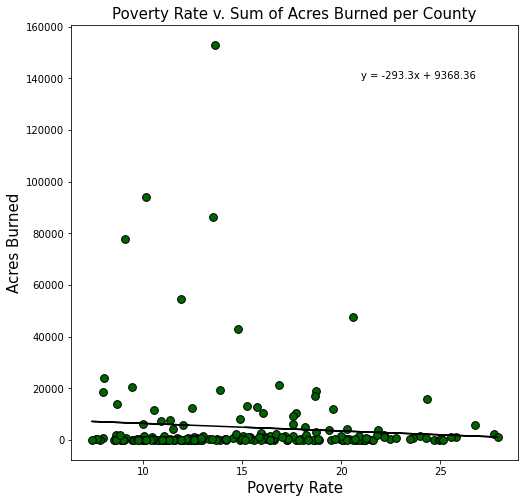

In [20]:
# Create a scatterplot for poverty rate v. sum of acres burned per county

x = cleaned_merged_sum_df['Poverty Rate']
y = cleaned_merged_sum_df['Acres Burned']

plt.figure(figsize=(8,8))
plt.title("Poverty Rate v. Sum of Acres Burned per County", fontsize = '15')
plt.xlabel("Poverty Rate", fontsize = '15')
plt.ylabel("Acres Burned", fontsize = '15')
plt.scatter(x, y, marker = "o", color = "darkgreen", edgecolors = "black", s = 60)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (21, 140000), fontsize = 10, color = "black")

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')

plt.plot(x,regress_values,"black")

plt.savefig('data_output/Figures/Poverty_Rate_Sum_Acres_Burned.png')

plt.show()

Correlation coefficient = -0.09
Linear regression model: y = -293.3x + 9368.36
P-Value = 0.22238348991499063


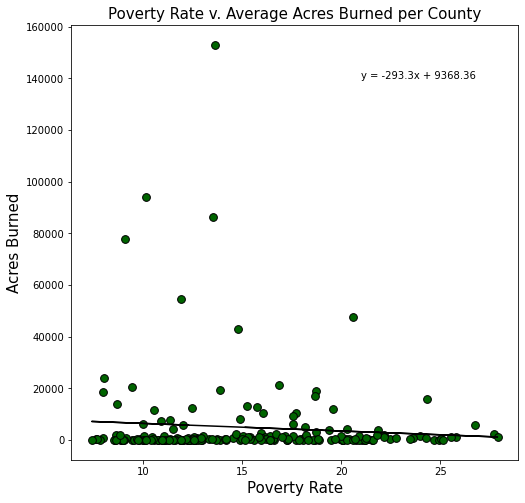

In [23]:
# Create a scatterplot for poverty rate v. acres burned

x = cleaned_merged_avg_df['Poverty Rate']
y = cleaned_merged_avg_df['Acres Burned']

plt.figure(figsize=(8,8))
plt.title("Poverty Rate v. Average Acres Burned per County", fontsize = '15')
plt.xlabel("Poverty Rate", fontsize = '15')
plt.ylabel("Acres Burned", fontsize = '15')
plt.scatter(x, y, marker = "o", color = "darkgreen", edgecolors = "black", s = 60)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (21, 140000), fontsize = 10, color = "black")

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')

plt.plot(x,regress_values,"black")

plt.savefig('data_output/Figures/Poverty_Rate_Acres_Burned.png')

plt.show()

Correlation coefficient = 0.02
Linear regression model: y = 0.02x + 3708.98
P-Value = 0.7759271211988347


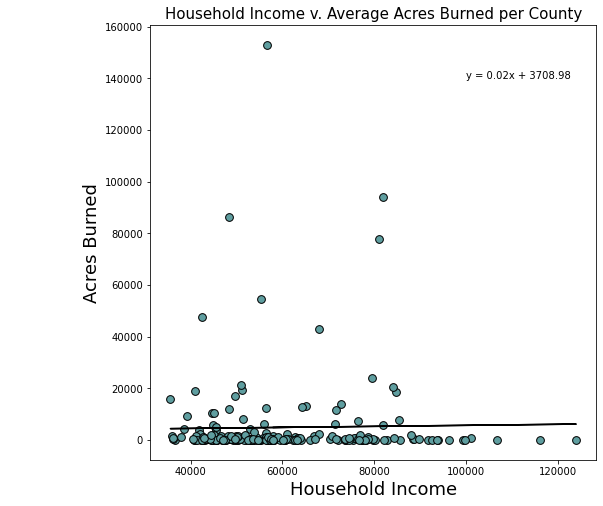

In [24]:
# Create a scatterplot for household income v. acres burned

x = cleaned_merged_avg_df['Household Income']
y = cleaned_merged_avg_df['Acres Burned']

plt.figure(figsize=(8,8))
plt.title("Household Income v. Average Acres Burned per County", fontsize = '15')
plt.xlabel("Household Income", fontsize = '18')
plt.ylabel("Acres Burned", fontsize = '18')
plt.scatter(x, y, marker = "o", color = "cadetblue", edgecolors = "black", s = 60)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (100000, 140000), fontsize = 10, color = "black")

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')

plt.plot(x,regress_values,"black")
plt.annotate(line_eq, (6, 10), fontsize = 15, color = "black")

plt.savefig('data_output/Figures/Household_Income_Acres_Burned.png')

plt.show()

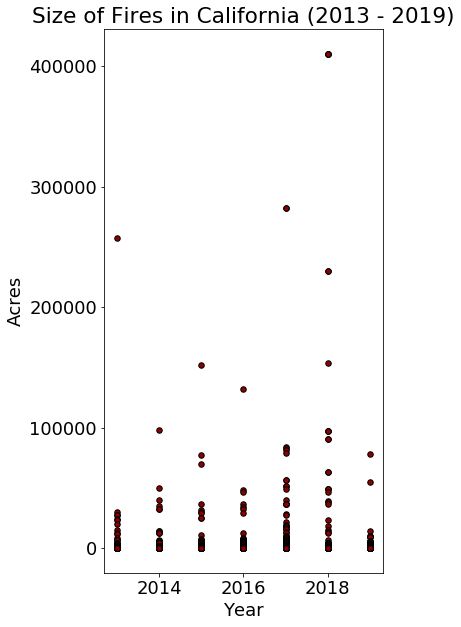

In [12]:
x = wildfire_df['Year']
y = wildfire_df['Acres Burned']

plt.figure(figsize = (5, 10))
plt.title("Size of Fires in California (2013 - 2019)")
plt.xlabel("Year")
plt.ylabel('Acres')

fire_plot = plt.scatter(x, y, marker = 'o', color = 'darkred', edgecolors = 'black', s = 30)

plt.savefig('data_output/Figures/fire_sizes.png')
plt.show()